# Домашнє завдання
Завдання, що пропонуються, необхідно оформити у вигляді одного jupyter ноутбука.

## Завдання 1
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

## Завдання 2
Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Завантажуємо датасети:

In [2]:
df_mnist = pd.read_csv("./data/mnist.csv", header=None, names=np.arange(0, 785))
display(df_mnist)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_data_2d = pd.read_csv("./data/data_2d.csv", header=None, names=np.arange(0, 3))
display(df_data_2d)

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


Будуємо та візуалізуємо залежності функції втрат від кількості кластерів:

Text(0.5, 0, 'Number of clusters')

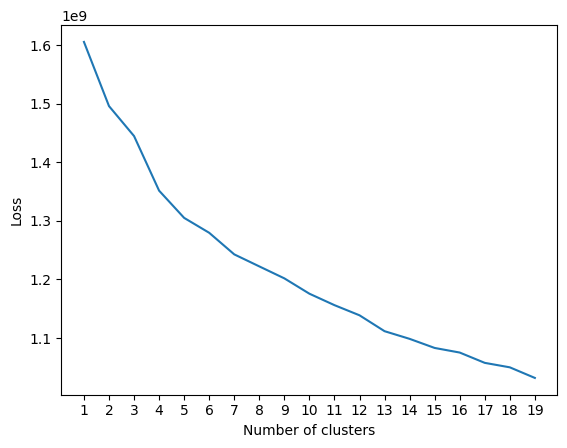

In [4]:
X_mnist = df_mnist[np.arange(1, 785)]
wcss = []
for i in range(1, 20):
    kmeans_mnist = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans_mnist.fit(X_mnist)
    wcss.append(kmeans_mnist.inertia_)

plt.plot(range(1, 20), wcss)
plt.xticks(np.arange(1, 20, step=1))
plt.ylabel('Loss')
plt.xlabel('Number of clusters')

Text(0.5, 0, 'Number of clusters')

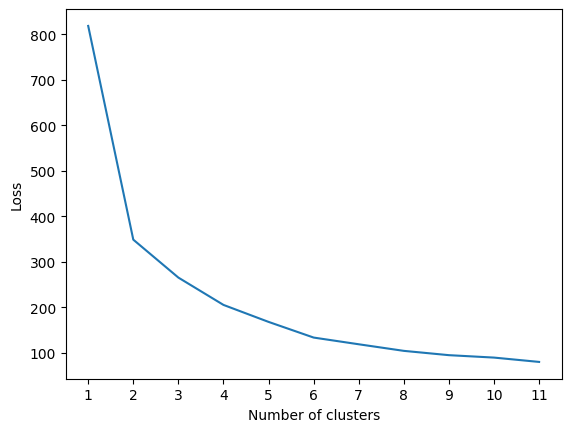

In [5]:
X_data_2d = df_data_2d[[1, 2]]
wcss = []
for i in range(1, 12):
    kmeans_data_2d = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans_data_2d.fit(X_data_2d)
    wcss.append(kmeans_data_2d.inertia_)

plt.plot(range(1, 12), wcss)
plt.xticks(np.arange(1, 12, step=1))
plt.ylabel('Loss')
plt.xlabel('Number of clusters')

Як видно з графіків, для mnist датасету зовсім не є очевидним вибір якогось оптимального значення кількості кластерів за методом ліктя - немає чіткого зламу графіка в жодній точці, в т.ч. в точці 10 - реальній кількості лейблів mnist датасету, що відповідає кількості цифр від 0 до 9, натомість для data_2d датасету метод ліктя дає очевидну кількість кластерів - 2, що збігається з кількістю лейблів. Спробуємо зменшити кілкьість змінних для mnist датасету з 784 до 2 методом PCA (principal component analysis):

In [6]:
pca = PCA(.18)
lower_dimensional_data = pca.fit_transform(X_mnist)
pca.n_components_

2

Знову будуємо та візуалізуємо залежність функції втрат від кількості кластерів для mnist датасету:

Text(0.5, 0, 'Number of clusters')

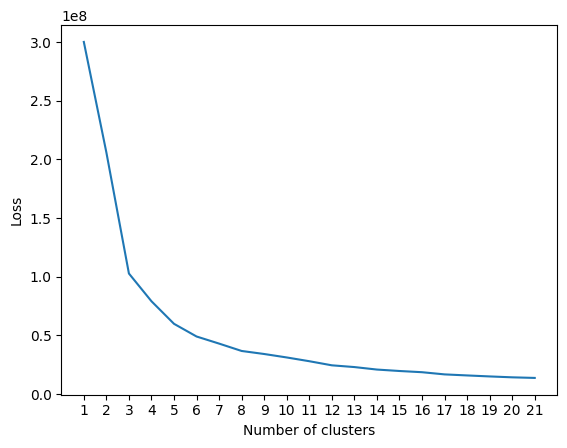

In [7]:
X_mnist = pd.DataFrame(lower_dimensional_data, columns=[1, 2])
wcss = []
for i in range(1, 22):
    kmeans_mnist = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans_mnist.fit(X_mnist)
    wcss.append(kmeans_mnist.inertia_)

plt.plot(range(1, 22), wcss)
plt.xticks(np.arange(1, 22, step=1))
plt.ylabel('Loss')
plt.xlabel('Number of clusters')

Тепер після такої кардинальної редукції кількості змінних для mnist датасету метод ліктя вже дає однозначну оптимальну кількість кластерів - 3. Візуалізуємо розподіл даних по кластерам для отриманої редукованої 2D-версії mnist датасету та для data_2d датасету:

In [8]:
kmeans_mnist = KMeans(n_clusters = 3, init = "k-means++", n_init = 'auto', random_state = 42)
y_kmeans_mnist = kmeans_mnist.fit_predict(X_mnist)

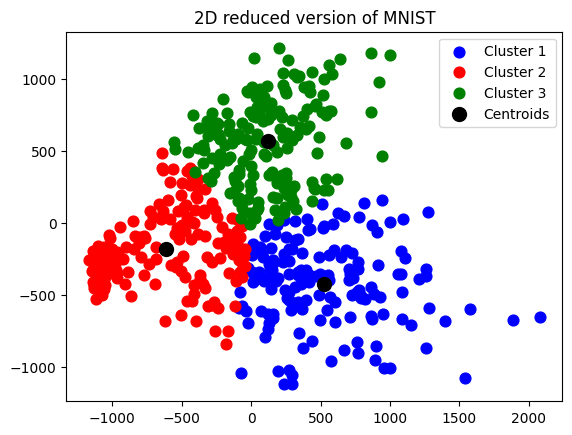

In [9]:
plt.scatter(X_mnist[y_kmeans_mnist == 0][1], X_mnist[y_kmeans_mnist == 0][2], s = 60, c = 'blue', label = 'Cluster 1')
plt.scatter(X_mnist[y_kmeans_mnist == 1][1], X_mnist[y_kmeans_mnist == 1][2], s = 60, c = 'red', label = 'Cluster 2')
plt.scatter(X_mnist[y_kmeans_mnist == 2][1], X_mnist[y_kmeans_mnist == 2][2], s = 60, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.title("2D reduced version of MNIST")
plt.show()

In [10]:
kmeans_data_2d = KMeans(n_clusters = 2, init = "k-means++", n_init = 'auto', random_state = 42)
y_kmeans_data_2d = kmeans_data_2d.fit_predict(X_data_2d)

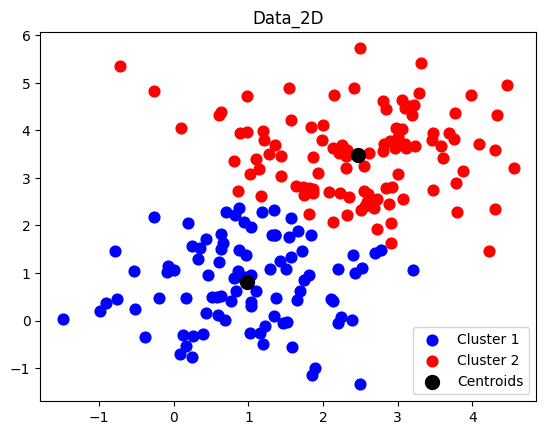

In [11]:
plt.scatter(X_data_2d[y_kmeans_data_2d == 0][1], X_data_2d[y_kmeans_data_2d == 0][2], s = 60, c = 'blue', label = 'Cluster 1')
plt.scatter(X_data_2d[y_kmeans_data_2d == 1][1], X_data_2d[y_kmeans_data_2d == 1][2], s = 60, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans_data_2d.cluster_centers_[:, 0], kmeans_data_2d.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.title("Data_2D")
plt.show()

### Висновок:
Виконавши задачі кластеризації методом K-means з використанням ліктевого методу на обох датасетах ми можемо дійти висновку, що з data_2d датасетом ми досягли оптимальних результатів. Натомість кластеризація даних mnist датасету (по суті своїй задача розпізнавання рукописних цифр) потребує подальшого дослідження.